## Overview
- File name: news_channel.py
- Author: Loïc Fischer
- Date created: 05/11/2022
- Date last modified: 22/12/2022
- Python Version: 3.9.13

**This file aims to give an overview of the "News & Politics" category in YouTube**

**A second part foccus on the sources of news**


### Overview of the "News & Politics" category 

In [2]:
## Import Libraries

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rc

import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np

import os

## Show more than one display per cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
## Import the data

PATH                = 'D:/Ada/'
DATA_CHANNEL        = 'df_channels_en.tsv.gz'
DATA_VIDEO_META     = 'yt_metadata_en.jsonl.gz'
DATA_COMMENT        = 'youtube_comments.tsv.gz'
NUM_COMMENT         = 'num_comments.tsv.gz'
COMPRESSION         = 'gzip'
SEPARATOR           = '\t'

df_channels   = pd.DataFrame()
df_video_meta = pd.DataFrame()
df_comments   = pd.DataFrame()

# Read data from memory and clean it
df_channels = pd.read_csv(os.path.join(PATH,DATA_CHANNEL), compression=COMPRESSION,sep=SEPARATOR)
df_channels = df_channels.dropna()

# Read data from memory and clean it
df_video_meta = pd.read_json(os.path.join(PATH,DATA_VIDEO_META), compression=COMPRESSION,lines=True, nrows=10000)
df_video_meta = df_video_meta.dropna()

# Read data from memory and clean it
df_comments = pd.read_csv(os.path.join(PATH,DATA_COMMENT),sep=SEPARATOR,nrows=1e6)
df_comments = df_comments.dropna()

## Display the first rows of the dataframes
df_channels.head(2)
df_video_meta.head(2)
df_comments.head(2)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:26.270363,Lego City Police Lego Firetruck Cartoons about...,1.0,SBqSc91Hn9g,1159,8.0,"lego city,lego police,lego city police,lego ci...",Lego City Police Lego Firetruck Cartoons about...,2016-09-28 00:00:00,1057
1,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:26.914516,Lego Marvel SuperHeroes Lego Hulk Smash Iron-M...,1.0,UuugEl86ESY,2681,23.0,"Lego superheroes,lego hulk,hulk smash,lego mar...",Lego Marvel SuperHeroes Lego Hulk Smash Iron-M...,2016-09-28 00:00:00,12894


,author,video_id,likes,replies
0,1,Gkb1QMHrGvA,2,0
1,1,CNtp0xqoods,0,0


#### Pie charts
Hereinafter, we present multiple pie charts on the categories. However, they are not used in the data story since we prefer the interactive version produced with plotly.

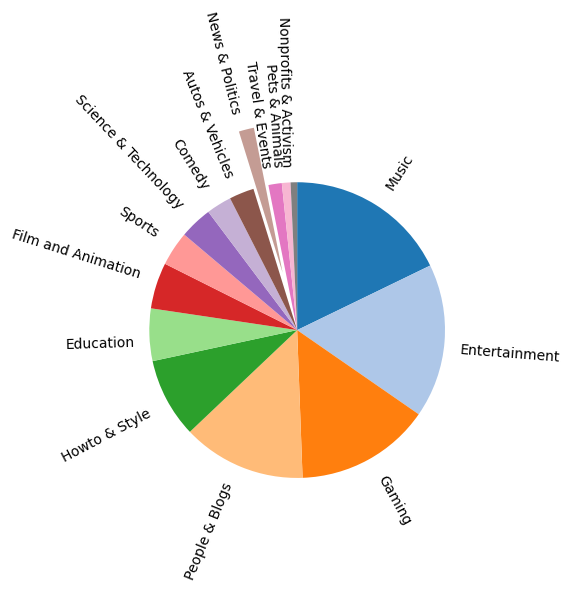

In [4]:
## Pie chart number of channels (not used in the data story)

palette_color =sns.color_palette('tab20')

g=df_channels.groupby(by=['category_cc'])
a=g.count().sort_values(by='subscribers_cc',ascending=False)

my_labels=list(a['videos_cc'].index)

my_explode=np.zeros(len(my_labels))
my_explode[my_labels.index('News & Politics')]=0.4

plt.pie(a['subscribers_cc'],labels=my_labels,rotatelabels=True,explode=my_explode,colors=palette_color,startangle=90,counterclock=False);


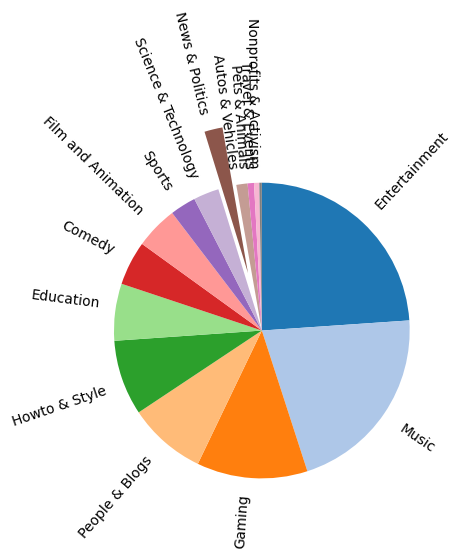

In [5]:
## Pie chart number of subscribers (not used in the data story)

palette_color =sns.color_palette('tab20')

g=df_channels.groupby(by=['category_cc'])
a=g.sum().sort_values(by='subscribers_cc',ascending=False)

my_labels=list(a['subscribers_cc'].index)

my_explode=np.zeros(len(my_labels))
my_explode[my_labels.index('News & Politics')]=0.4

plt.pie(a['subscribers_cc'],labels=my_labels,rotatelabels=True,explode=my_explode,colors=palette_color,startangle=90,counterclock=False);


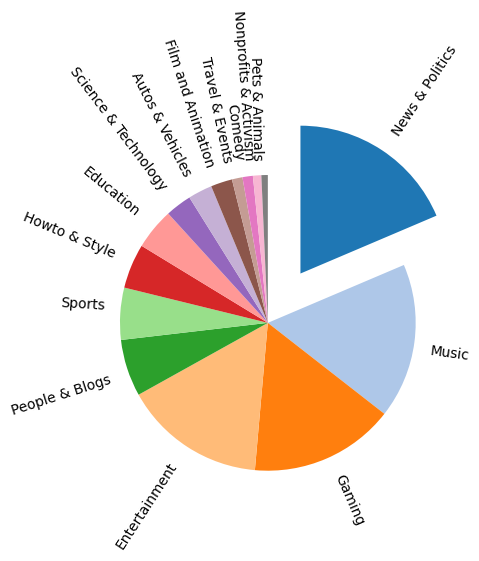

In [6]:
## Pie chart number of videos (not used in the data story)

palette_color =sns.color_palette('tab20')

g=df_channels.groupby(by=['category_cc'])
a=g.sum().sort_values(by='videos_cc',ascending=False)

my_labels=list(a['videos_cc'].index)

my_explode=np.zeros(len(my_labels))
my_explode[my_labels.index('News & Politics')]=0.4

plt.pie(a['videos_cc'],labels=my_labels,rotatelabels=True,explode=my_explode,colors=palette_color,startangle=90,counterclock=False);


In [7]:
## Count of the total number of views per category
## Has been commented due to it long time to run, the results are saved in "csv_outputs/view_count.csv"

'''
## Initialize
i=0
view_count=0

## Create chunks to iterate on
chunks = pd.read_json(os.path.join(PATH,DATA_VIDEO_META),compression=COMPRESSION, lines=True, chunksize = 2e5)

## Iteration on the chunks
for chunk in chunks:

    ## Keep the previous result in a variable
    view_count_old=view_count

    ## Get the new values for the chunk
    view_count=chunk.groupby(by='categories').sum('view_count')

    ## Summing the previus result with the current one
    view_count=view_count_old+view_count

    #chunk.groupby(by='categories').sum('view_count')

    ## Print i to get a progress report
    i=i+1
    print(i)

## Display
print(view_count)

## Saving
#view_count.to_csv('csv_outputs/view_count.csv')
'''

"\n## Initialize\ni=0\nview_count=0\n\n## Create chunks to iterate on\nchunks = pd.read_json(os.path.join(PATH,DATA_VIDEO_META),compression=COMPRESSION, lines=True, chunksize = 2e5)\n\n## Iteration on the chunks\nfor chunk in chunks:\n\n    ## Keep the previous result in a variable\n    view_count_old=view_count\n\n    ## Get the new values for the chunk\n    view_count=chunk.groupby(by='categories').sum('view_count')\n\n    ## Summing the previus result with the current one\n    view_count=view_count_old+view_count\n\n    #chunk.groupby(by='categories').sum('view_count')\n\n    ## Print i to get a progress report\n    i=i+1\n    print(i)\n\n## Display\nprint(view_count)\n\n## Saving\n#view_count.to_csv('csv_outputs/view_count.csv')\n"

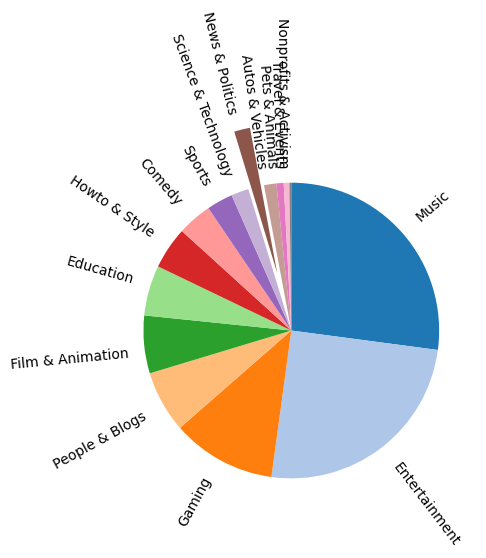

In [8]:
## Total number of views (not used in the data story)

## Reading data created in the previous cell
view_cat=pd.read_csv('csv_outputs/view_count.csv')

## Cleaning
view_cat=view_cat.dropna()

## Sorting
view_cat=view_cat.sort_values(by='view_count',ascending=False)

## Set labels
my_labels=list(view_cat.categories)

## Set explode to highligh the category "News & Politics"
my_explode=np.zeros(len(my_labels))
my_explode[my_labels.index('News & Politics')]=0.4

## Creating plot
plt.pie(view_cat.view_count,labels=my_labels,rotatelabels=True,explode=my_explode,colors=palette_color,startangle=90,counterclock=False);


In [9]:
## Interactive Pie Chart with the total number of videos.

## Set data
a=df_channels.groupby(by=['category_cc']).sum().sort_values(by='videos_cc',ascending=False)

## Set labels
my_labels=list(a.index)

## Set explode to highligh the category "News & Politics"
my_explode=np.zeros(len(my_labels))
my_explode[my_labels.index('News & Politics')]=0.4

## Creating the plot
pie_videos=go.Pie(   labels=my_labels,
                                values=a['videos_cc'],
                                marker_colors=px.colors.qualitative.G10,
                                pull=my_explode,
                                title='Number of videos'
                                )

## Creating the figure
fig_video = go.Figure(data=[pie_videos])

## Layout
fig_video.update_layout(
    autosize=False,
    width=750,
    height=500
    )

## Save figure
#fig_video.write_html('html_figures/pie_videos.html')

## Display
fig_video.show();

In [10]:
## Interactive Pie Chart with the total number of views.

## Set labels
my_labels=list(view_cat.categories)

## Set explode to highligh the category "News & Politics"
my_explode=np.zeros(len(my_labels))
my_explode[my_labels.index('News & Politics')]=0.4

## Creating the plot
pie_view=go.Pie(   labels=my_labels,
                                values=view_cat.view_count,
                                marker_colors=px.colors.qualitative.G10,
                                pull=my_explode,
                                title='Number of views'
                                )

## Layout
fig_view = go.Figure(data=[pie_view])
fig_view.update_layout(
    autosize=False,
    width=750,
    height=500
    );

## Save figure
#fig_view.write_html('html_figures/pie_views.html');

## Display
fig_view.show();

In [11]:
## Interactive Pie Chart with the total number of channels.

a=df_channels.groupby(by=['category_cc']).count().sort_values(by='subscribers_cc',ascending=False)

## Set labels
my_labels=list(view_cat.categories)

## Set explode to highligh the category "News & Politics"
my_explode=np.zeros(len(my_labels))
my_explode[my_labels.index('News & Politics')]=0.4

## Creating the plot
pie_channels=go.Pie(    labels=my_labels,
                        values=a.channel,
                        marker_colors=px.colors.qualitative.G10,
                        pull=my_explode,
                        title='Number of channels'
                    )

## Creating the figure
fig_channels = go.Figure(data=[pie_channels])

## Layout
fig_channels.update_layout(
    autosize=True,
    #width=750,
    #height=500,
    
    );
#fig_channels["layout"].update(margin=dict(l=0,r=0,t=0,b=0))
## Save figure
#fig_channels.write_html('html_figures/pie_channels.html');

## Display
fig_channels.show();


In [16]:
## Creating a subplot with the pie charts

from plotly import tools
fig = make_subplots(rows=2, cols=2,specs=[[{"type": "pie"},{"type": "pie"}], [{"type": "pie"},{"type": "pie"}]],vertical_spacing = 0)

fig.add_trace(pie_videos, row=1, col=1);

fig.add_trace(pie_view, row=2, col=1);

fig.add_trace(pie_channels, row=2, col=2);


## Layout
fig.update_layout( title={  'text':"Overview of News & Politics category",
                            'x':0.5,
                            'xanchor':'center'},
                            height=1000,
                            margin=dict(l=20, r=20, t=0, b=20,pad=0),
                            legend=dict(
                                        yanchor="top",
                                        y=0.99,
                                        xanchor="right",
                                        x=0.9),
                            plot_bgcolor = None
                            
                )

## Save figure
fig.write_html('../ste_website/ADAmantiumForgers/_includes/figures/news_pol_3pie_superposed.html')

## Display
fig.show();

### Sources of news

#### Age group

In [ ]:
## Creating a bar plot concerning the source of news (Not used in the data story)

## Data from : https://www.pewresearch.org/fact-tank/2019/09/11/key-findings-about-the-online-news-landscape-in-america/
data = {
'Age':['18-29','30-49','50-64','65+'],
'TV': [27,45,72,85],
'Online': [50, 49, 29,20],
'Radio': [14,27, 29, 24],
'Print newspapers': [5, 10, 23, 48]
}

news_sources=pd.DataFrame(data)
x=news_sources.columns

## Plot
fig = px.bar(news_sources, x='Age', y=['TV','Online','Radio','Print newspapers'] ,  title="News media per age")
fig.show()

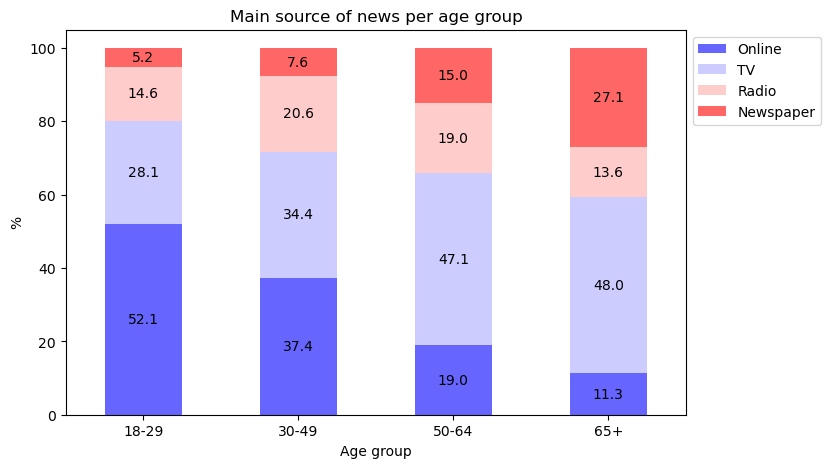

In [ ]:
# pandas dataframe
sns.set_palette("bwr",n_colors=4) 

raw_data = {    'TV': [27,45,72,85],
                'Online': [50, 49, 29,20],
                'Radio': [14,27, 29, 24],
                'Print newspapers': [5, 10, 23, 48]}

df = pd.DataFrame(raw_data)
 
## From raw value to percentage
totals = [i+j+k+l for i,j,k,l in zip(df['TV'], df['Online'], df['Radio'],df['Print newspapers'])]
TV = [i / j * 100 for i,j in zip(df['TV'], totals)]
Online = [i / j * 100 for i,j in zip(df['Online'], totals)]
Radio = [i / j * 100 for i,j in zip(df['Radio'], totals)]
Print_newspapers= [i / j * 100 for i,j in zip(df['Print newspapers'], totals)]
 
## Creating dataframe
df = pd.DataFrame(data={'Online':Online, 'TV': TV, 'Radio': Radio, 'Newspaper': Print_newspapers})
df.index = ['18-29','30-49','50-64','65+']

## Creating the bars
ax = df.plot(kind='bar', stacked=True, figsize=(8, 5), rot=0, xlabel='Age group', ylabel='%')
for c in ax.containers:

    ## Optional: if the segment is small or 0, customize the labels
    labels = [round(v.get_height(),1) if v.get_height() > 0 else '' for v in c]
    
    ## remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

## Layout
plt.title('Main source of news per age group')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)


## Save plot
plt.savefig('figures/main_source_news_age.png',bbox_inches='tight')

plt.show();

#### Social media

In [17]:
## Initialize data for the bar plot
## Source: https://www.pewresearch.org/journalism/2021/01/12/news-use-across-social-media-platforms-in-2020/pj_2021-01-12_news-social-media_0-02/

data = {
'social_media':['Facebook','Youtube','Twitter','Instagram','Reddit','Snapchat','LinkedIn','TikTok','WhatsApp'],
'visit': [68,74,25,40,15,22,25,12,19],
'news': [36, 23, 15,11,6,4,4,3,3],
}
social_media_as_news=pd.DataFrame(data)
social_media_as_news

,social_media,visit,news
0,Facebook,68,36
1,Youtube,74,23
2,Twitter,25,15
3,Instagram,40,11
4,Reddit,15,6
5,Snapchat,22,4
6,LinkedIn,25,4
7,TikTok,12,3
8,WhatsApp,19,3


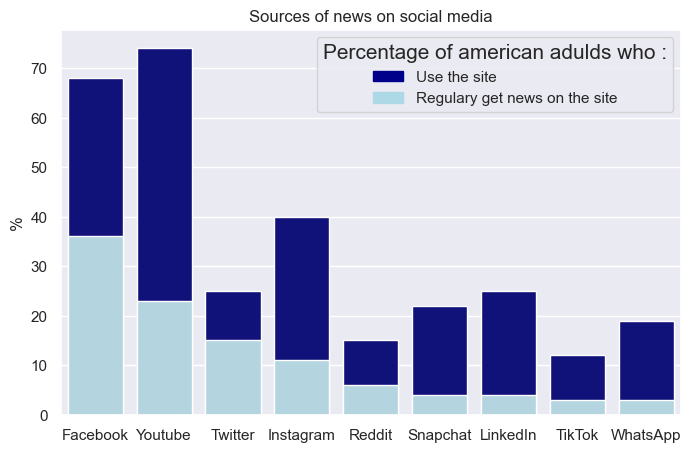

In [18]:
##Bar plot

## set plot style: grey grid in the background:
sns.set(style="darkgrid")

## set the figure size
plt.figure(figsize=(8, 5))


## bar chart 1 -> top bars
bar1 = sns.barplot(x="social_media",  y="visit", data=social_media_as_news, color='darkblue')


## bar chart 2 -> bottom bars
bar2 = sns.barplot(x="social_media", y="news", data=social_media_as_news, estimator=sum, ci=None,  color='lightblue')

## add legend
top_bar = mpatches.Patch(color='darkblue', label='Use the site')
bottom_bar = mpatches.Patch(color='lightblue', label='Regulary get news on the site')
legend=plt.legend(handles=[top_bar, bottom_bar],title ="Percentage of american adulds who :")
plt.setp(legend.get_title(),fontsize=15);

## Layout of plot
bar1.set(xlabel=None,ylabel='%')

## Add a titlte
plt.title('Sources of news on social media')

## Save figure
plt.savefig('../ste_website/ADAmantiumForgers/assets/img/sources_of_news.png', bbox_inches='tight')

## show the graph
plt.show();